In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
donor_ex_o = pd.read_csv('Donor_1.csv', index_col =[0])
#donor_ex.columns
donor_ex = donor_ex_o.drop(columns = 'geneID')
donor_ex.head()

,occipital neocortex,primary motor-sensory cortex (samples),amygdaloid complex,medial ganglionic eminence,posterior (caudal) superior temporal cortex (area 22c),upper (rostral) rhombic lip,caudal ganglionic eminence,dorsal thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,dorsolateral prefrontal cortex,orbital frontal cortex,lateral ganglionic eminence,"inferolateral temporal cortex (area TEv, area 20)",hippocampus (hippocampal formation),ventrolateral prefrontal cortex,parietal neocortex
ensembl_gene_id,,,,,,,,,,,,,,,,
ENSG00000000003,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,41.084665,22.177874,23.640053,43.194162,30.133433,26.391215
ENSG00000000005,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,0.635343,0.049313,0.006587,0.163946,0.086484,0.159348
ENSG00000000419,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,29.371442,17.982009,19.390473,26.140231,27.771254,22.094928
ENSG00000000457,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,3.287066,3.602514,3.308546,3.557031,3.135879,3.467244
ENSG00000000460,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,2.804860,2.861844,2.011409,3.774340,2.687870,3.047570


In [3]:
donor_ex_sub = donor_ex.sample(300)
donor_ex_sub.shape
#donor_ex_sub.to_csv('Donor1_sub_300_labels.csv', index=True)
#donor_ex_sub.to_csv('Small_DF_100_labels.csv', index=True)

(300, 16)

In [4]:
#sns.clustermap(donor_ex_sub, cmap="viridis", method="ward", row_cluster=True)
#plt.show()

In [5]:
donor_ex.head()

,occipital neocortex,primary motor-sensory cortex (samples),amygdaloid complex,medial ganglionic eminence,posterior (caudal) superior temporal cortex (area 22c),upper (rostral) rhombic lip,caudal ganglionic eminence,dorsal thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,dorsolateral prefrontal cortex,orbital frontal cortex,lateral ganglionic eminence,"inferolateral temporal cortex (area TEv, area 20)",hippocampus (hippocampal formation),ventrolateral prefrontal cortex,parietal neocortex
ensembl_gene_id,,,,,,,,,,,,,,,,
ENSG00000000003,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,41.084665,22.177874,23.640053,43.194162,30.133433,26.391215
ENSG00000000005,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,0.635343,0.049313,0.006587,0.163946,0.086484,0.159348
ENSG00000000419,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,29.371442,17.982009,19.390473,26.140231,27.771254,22.094928
ENSG00000000457,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,3.287066,3.602514,3.308546,3.557031,3.135879,3.467244
ENSG00000000460,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,2.804860,2.861844,2.011409,3.774340,2.687870,3.047570


In [6]:
from sklearn.preprocessing import StandardScaler
features = donor_ex.columns

In [7]:
# Separating out the features
x = donor_ex.loc[:, features].values

# Separating out the target
y = donor_ex_o.loc[:,['geneID']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')

principalComponents = pca.fit_transform(x)
#principalComponents
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,1.207014,-0.541395
1,-0.890762,0.038357
2,0.843881,-0.407344
3,-0.654088,0.008191
4,-0.689574,-0.015246


In [9]:
finalDF = principalDf.copy()
geneIDs = donor_ex_o.loc[:,['geneID']].values
finalDF['ensembl_gene_id'] = geneIDs


finalDF.shape

(16150, 3)

In [10]:
#sns.scatterplot(data=finalDF, x="principal component 1", y="principal component 2").set(title='PCA')

In [11]:
#pca.explained_variance_ratio_

In [12]:
'''#Now do Kmeans clustering on donor_ex
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(principalDf) 
    wcss.append(kmeans.inertia_)
'''  


"#Now do Kmeans clustering on donor_ex\nfrom sklearn.cluster import KMeans\nwcss = []\nfor i in range(1, 20): \n    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)\n    kmeans.fit(principalDf) \n    wcss.append(kmeans.inertia_)\n"

In [13]:
'''plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.title("Elbow Plot")
plt.show()'''

'plt.plot(range(1, 20), wcss)\nplt.xlabel(\'Number of clusters\')\nplt.ylabel(\'WCSS\') \nplt.title("Elbow Plot")\nplt.show()'

In [14]:
principalDf.shape

#plt.scatter(principalDf[:,0], principalDf[:,1], c=kmeans.labels_.astype(float))
#plt.show()

(16150, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


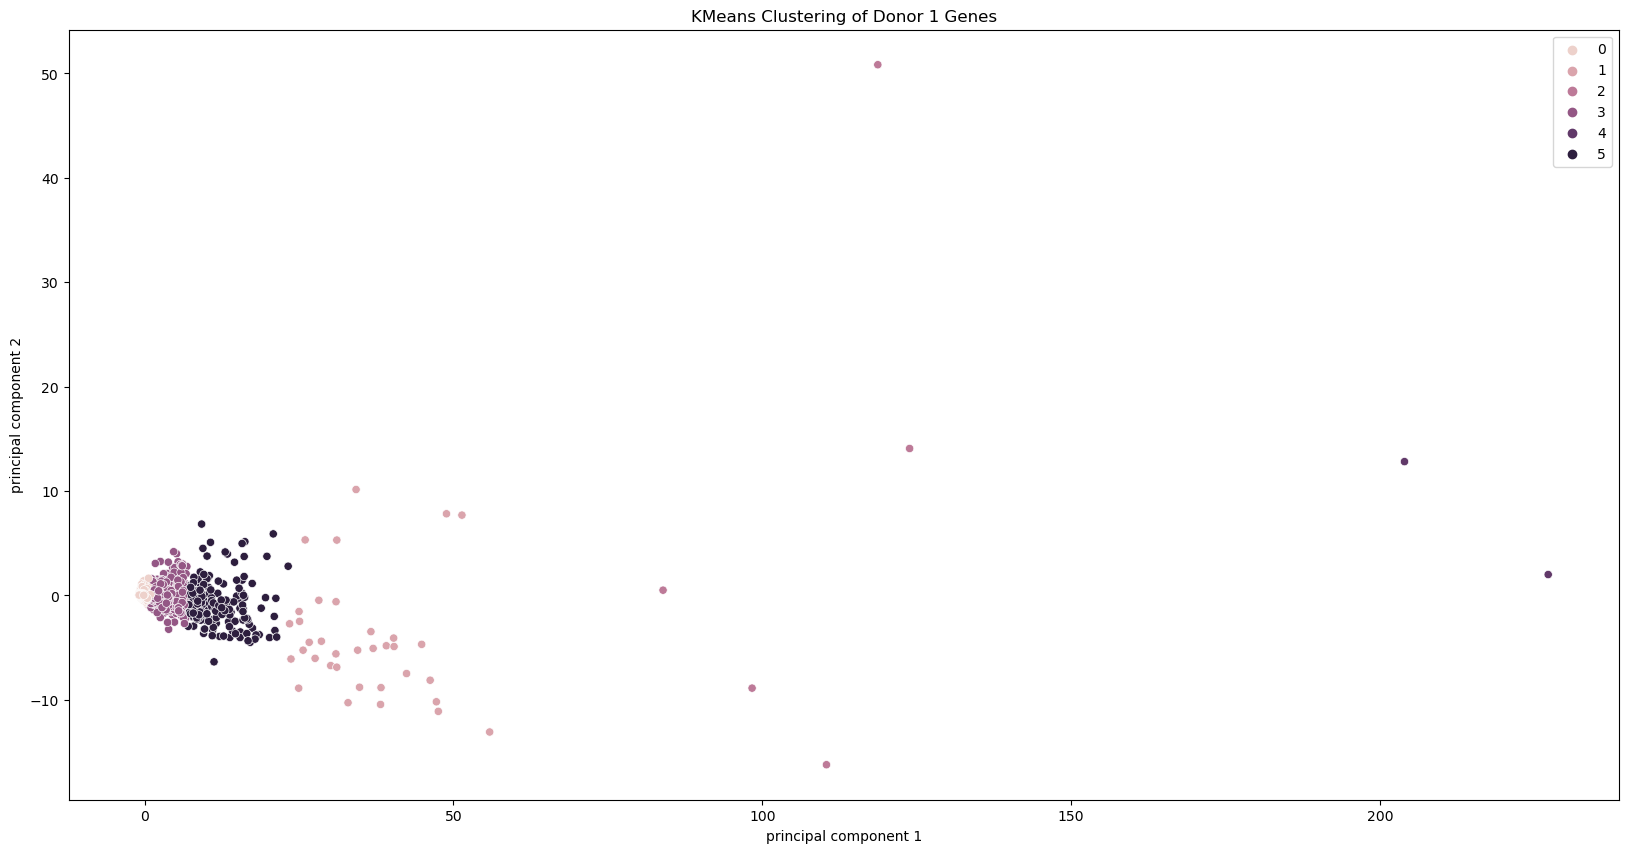

In [15]:
km6 = KMeans(n_clusters=6, random_state=0) 

km6.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km6.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


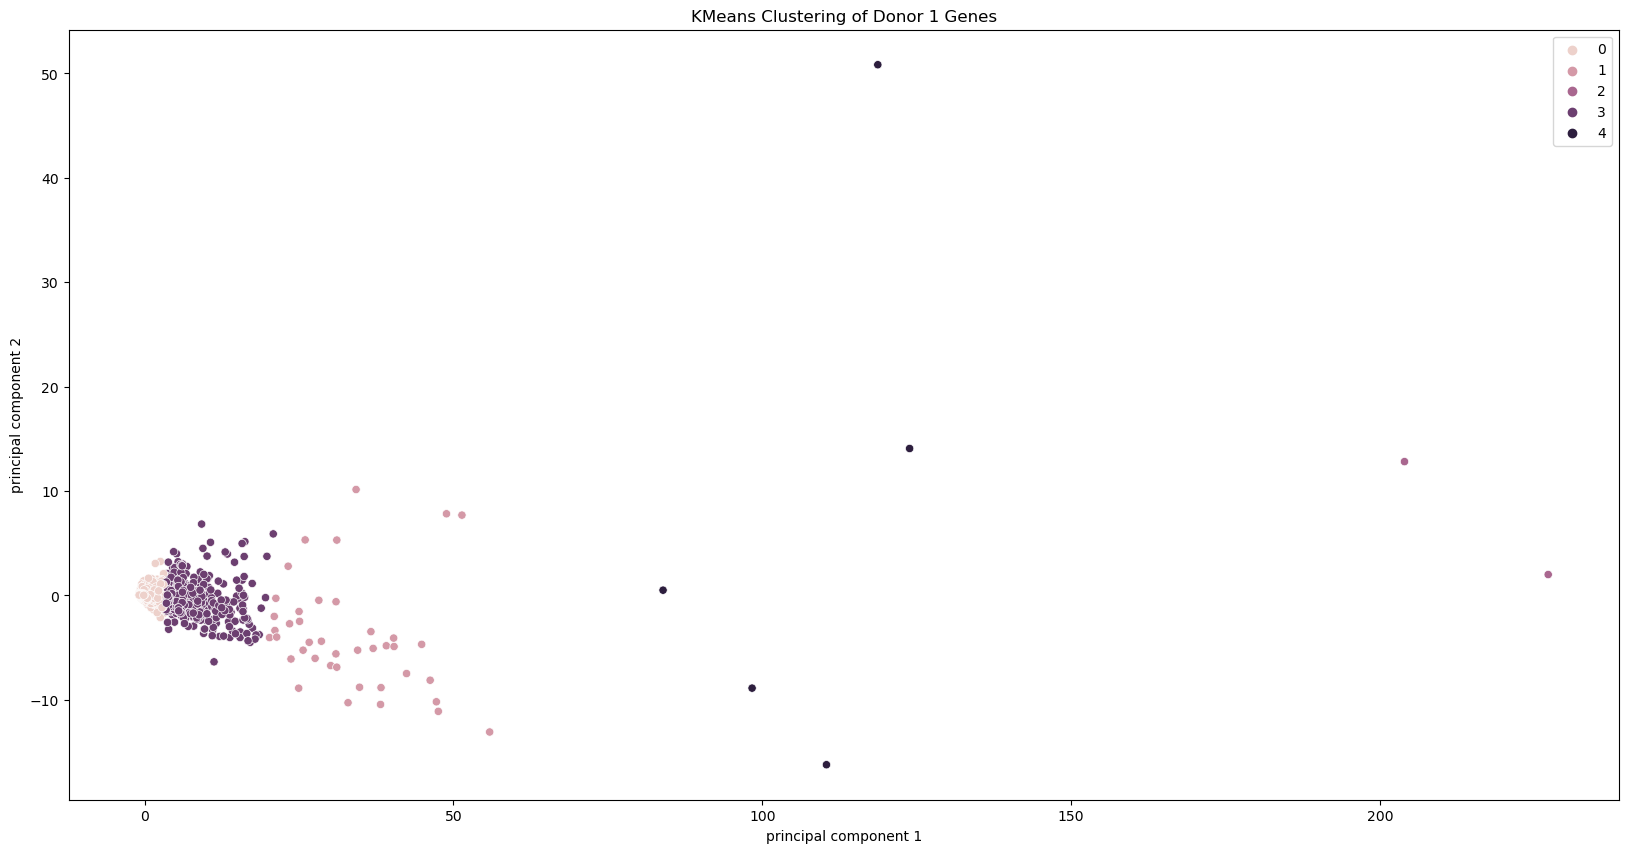

In [16]:
km5 = KMeans(n_clusters=5, random_state=0) 

km5.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km5.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


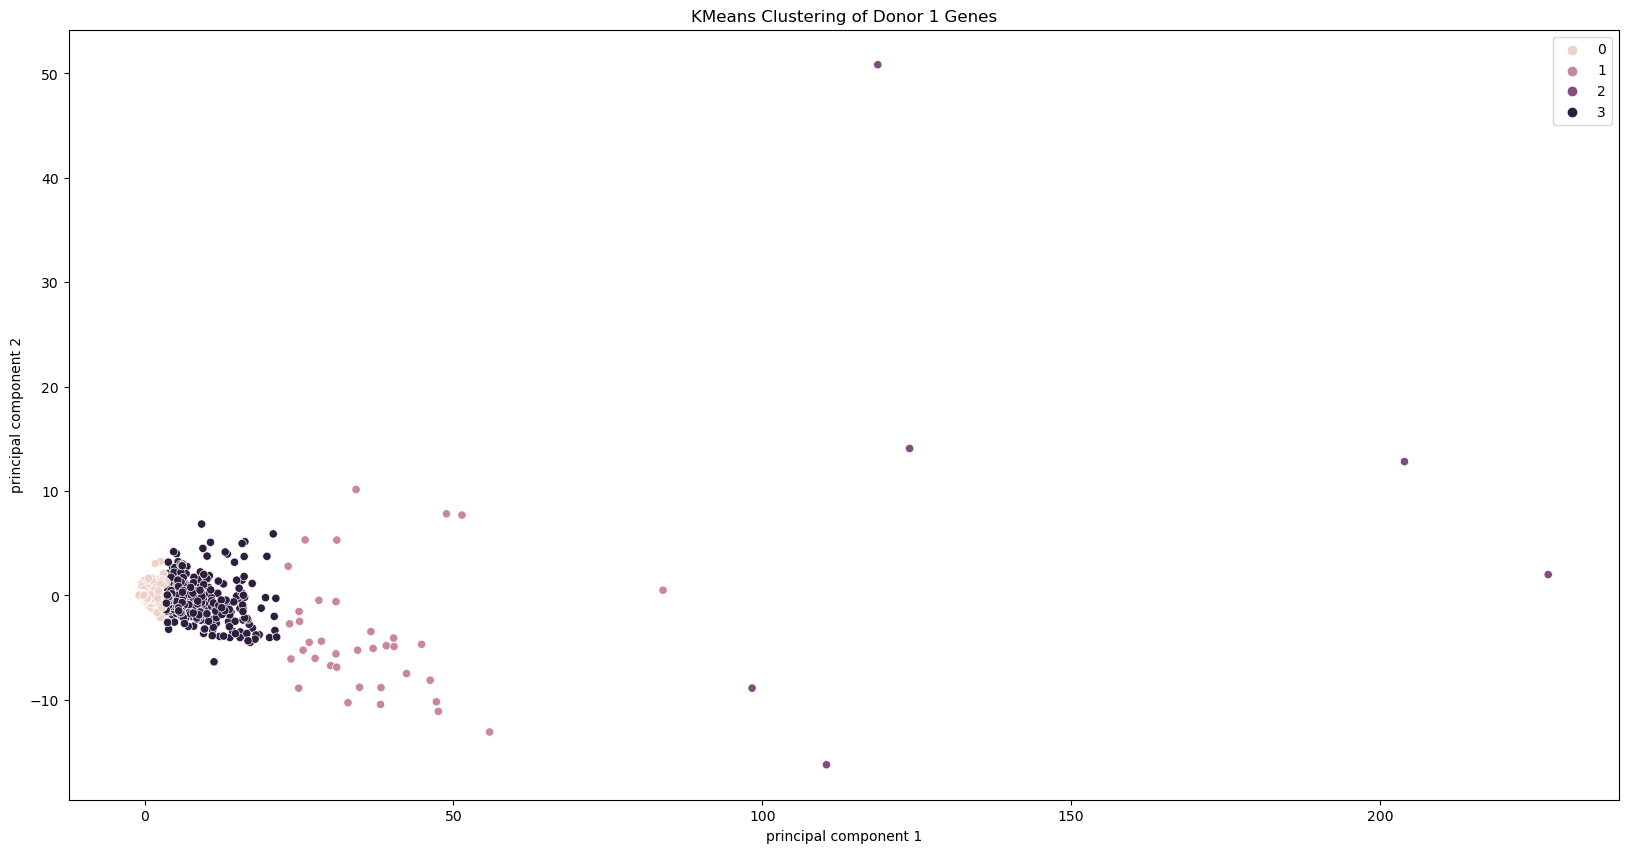

In [17]:
km4 = KMeans(n_clusters=4, random_state=0) 
km4.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km4.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


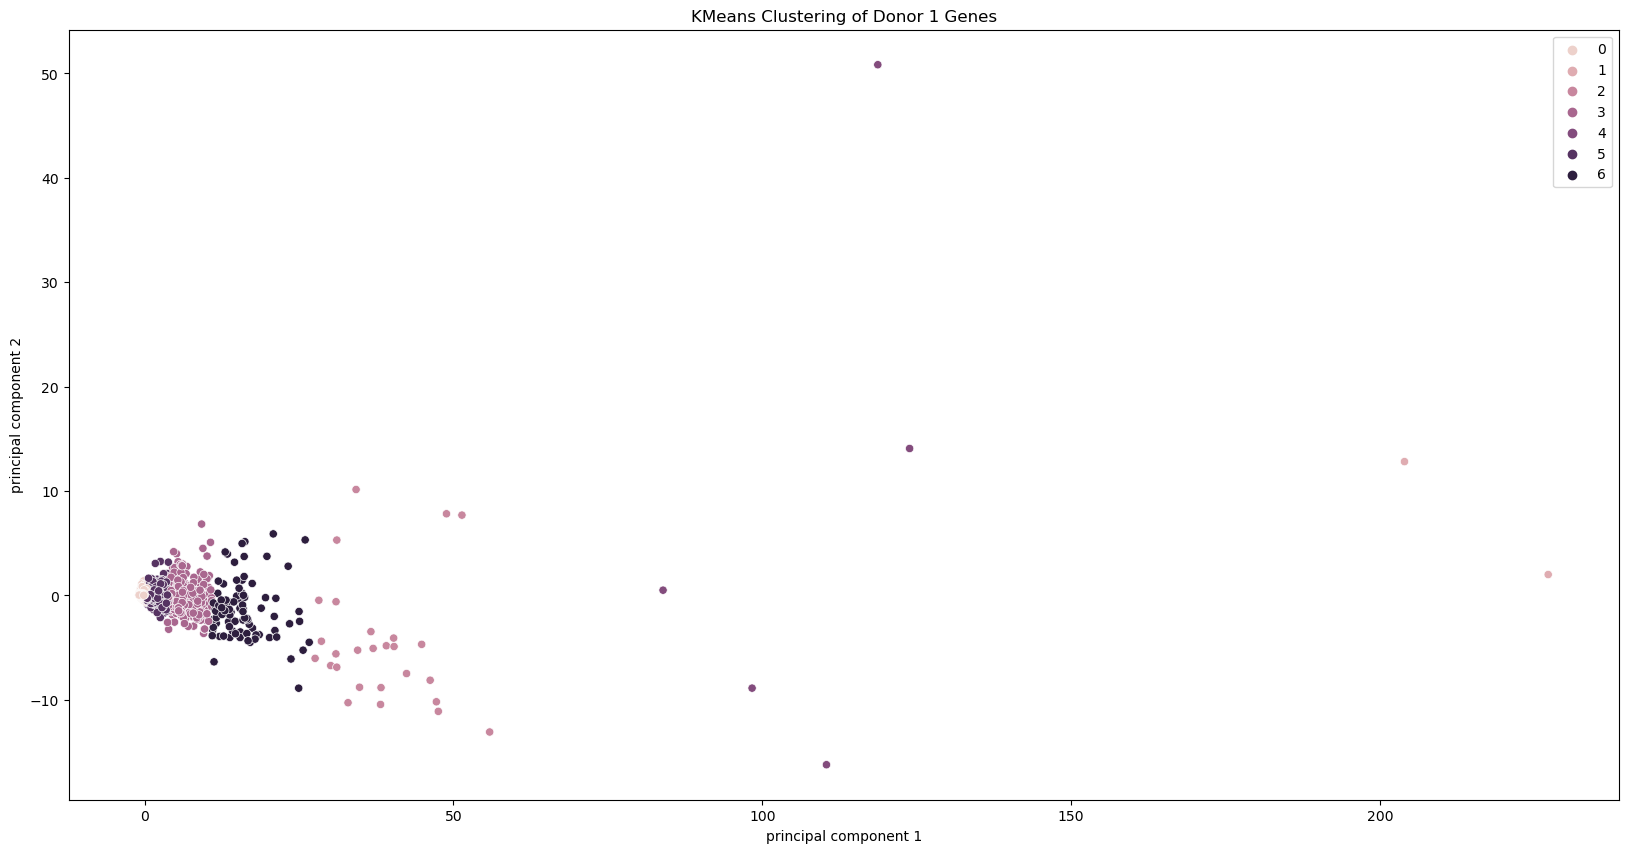

In [18]:
km7 = KMeans(n_clusters=7, random_state=0) 
km7.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km7.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


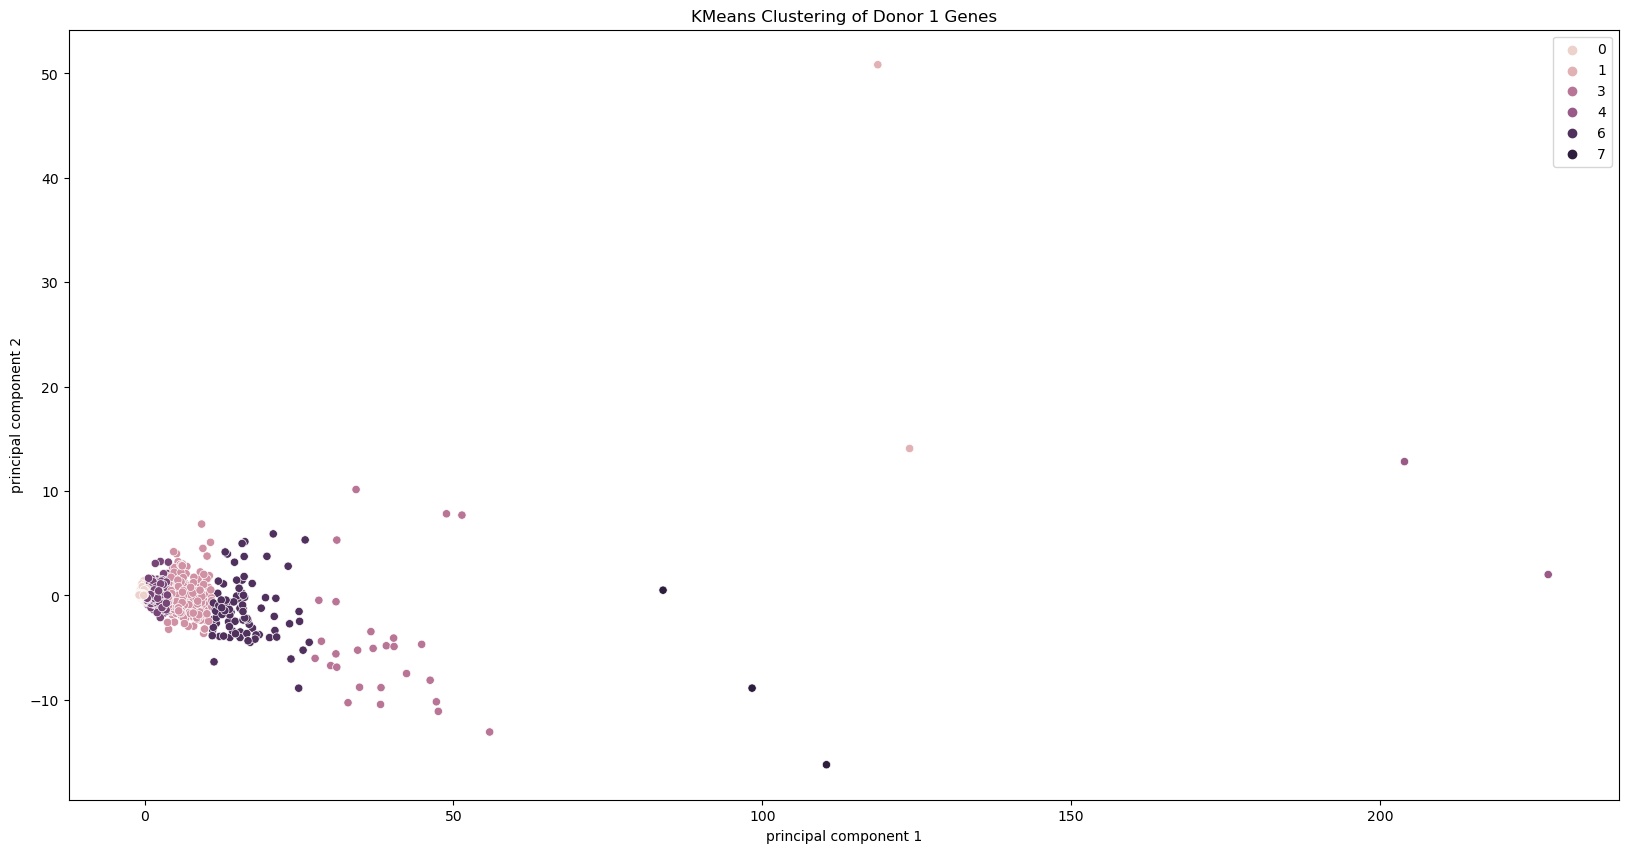

In [19]:
km8 = KMeans(n_clusters=8, random_state=0) 
km8_fit = km8.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km8.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [20]:
#inertias = [km8.inertia_,km7.inertia_,km.inertia_, km5.inertia_, km4.inertia_]
#ks = [8,7,6,5,4]
#k_i = pd.DataFrame({'K': ks,
#     'SSE': inertias
#    })
#k_i

In [72]:
small_df = donor_ex.sample(100)
small_df.head()
#small_df.shape

,occipital neocortex,primary motor-sensory cortex (samples),amygdaloid complex,medial ganglionic eminence,posterior (caudal) superior temporal cortex (area 22c),upper (rostral) rhombic lip,caudal ganglionic eminence,dorsal thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,dorsolateral prefrontal cortex,orbital frontal cortex,lateral ganglionic eminence,"inferolateral temporal cortex (area TEv, area 20)",hippocampus (hippocampal formation),ventrolateral prefrontal cortex,parietal neocortex
ensembl_gene_id,,,,,,,,,,,,,,,,
ENSG00000176182,3.100105,3.649283,2.213957,2.673490,3.541005,4.954400,3.919709,1.615065,2.261156,1.706639,1.228819,4.149680,2.705429,2.532858,2.585153,3.661907
ENSG00000128050,58.502133,51.983401,32.228061,58.855782,35.875402,17.066435,58.093419,32.237639,57.244402,51.694952,34.569844,45.102636,36.569160,49.848219,40.104451,48.404170
ENSG00000116120,25.504592,22.548559,26.021913,22.328471,24.122825,18.184846,20.653891,20.505321,24.844233,25.627354,22.233683,22.681371,24.517047,20.243629,22.166709,22.646022
ENSG00000070882,0.363168,0.510284,0.456305,0.688091,0.490377,2.082427,0.677862,0.675489,0.444437,0.367184,0.384162,0.479629,0.516165,0.909145,0.424218,0.465573
ENSG00000124215,0.006249,0.019006,0.000000,0.000000,0.019623,0.029211,0.006055,0.246014,0.007840,0.008372,0.039771,0.027493,0.011776,0.032679,0.007991,0.042143


In [73]:
# Separating out the features
xdf = small_df.loc[:, features].values

# Separating out the target
ydf = donor_ex_o.loc[:,['geneID']].values

# Standardizing the features
xdf = StandardScaler().fit_transform(xdf)

In [74]:
principalComponents = pca.fit_transform(xdf)
#principalComponents
pca_smdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_smdf.head()

,principal component 1,principal component 2
0,-1.552745,-0.080834
1,11.513908,1.296059
2,4.933237,-1.030672
3,-2.313956,0.003896
4,-2.513387,0.146299


In [75]:
#Now do Kmeans clustering on donor_ex
#from sklearn.cluster import KMeans
#wcss_sm = []
#for i in range(1, 20): 
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(pca_smdf) 
#    wcss_sm.append(kmeans.inertia_)

In [76]:
#plt.plot(range(1, 20), wcss_sm)
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS') 
#plt.title("Elbow Plot")
#plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


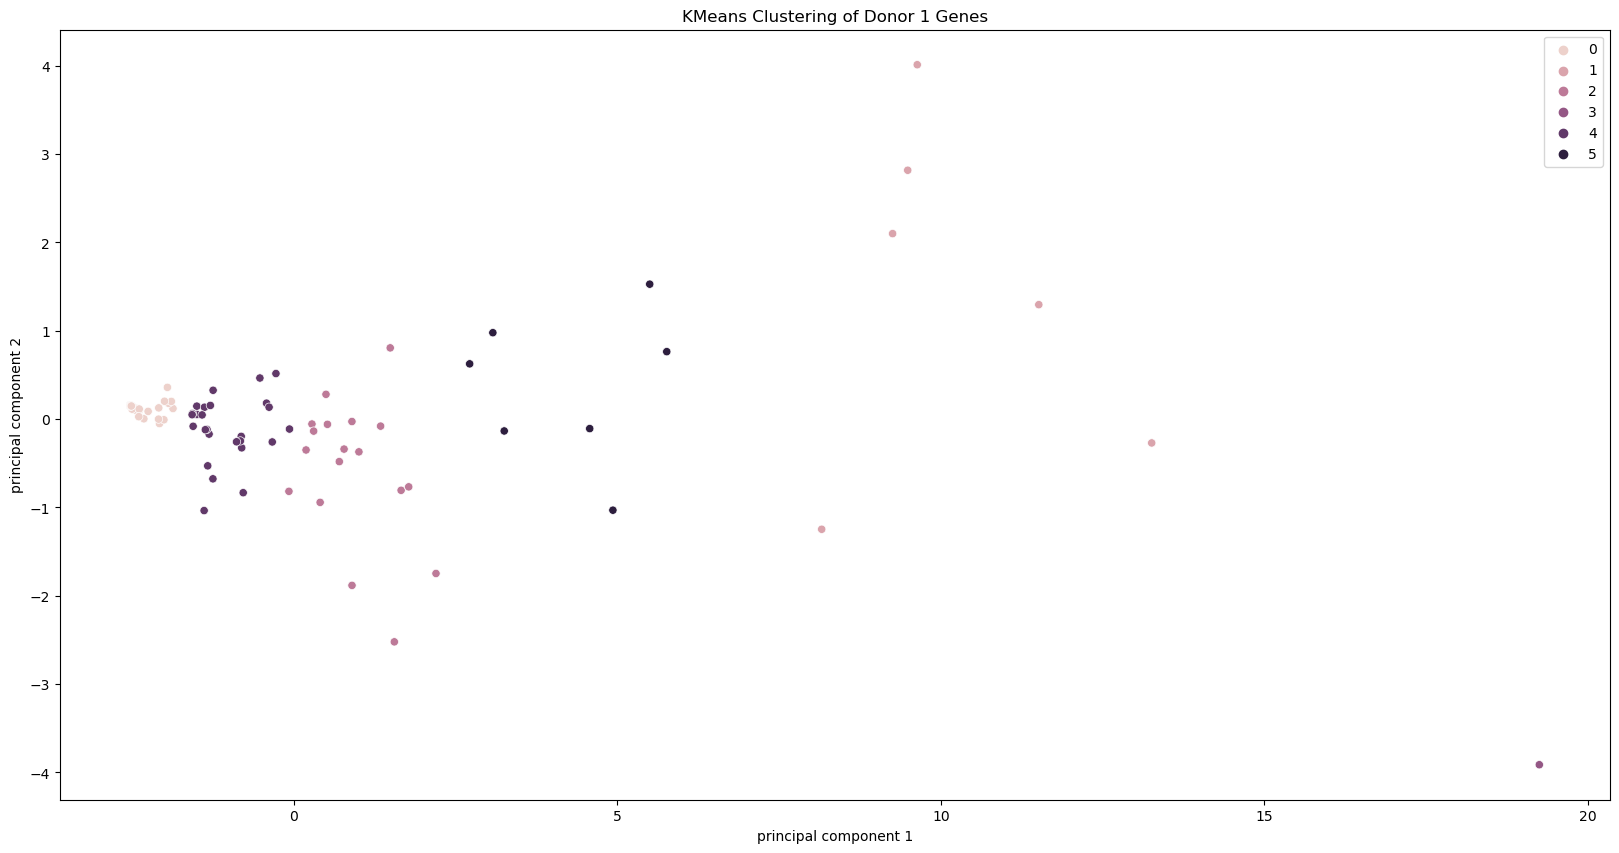

In [77]:
ks6 = KMeans(n_clusters=6, random_state=0) 
ks6.fit(pca_smdf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=pca_smdf, x="principal component 1", y="principal component 2", hue=ks6.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [78]:
ks6_sil = silhouette_score(pca_smdf, ks6.labels_, metric='euclidean', random_state=42)
ks6_sil

0.5711644598901878

In [79]:
ks5 = KMeans(n_clusters=5, random_state=0) 
ks5.fit(pca_smdf)
ks5_sil = silhouette_score(pca_smdf, ks5.labels_, metric='euclidean', random_state=42)
ks5_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5986558240400577

In [80]:
ks4 = KMeans(n_clusters=4, random_state=0) 
ks4.fit(pca_smdf)
ks4_sil = silhouette_score(pca_smdf, ks4.labels_, metric='euclidean', random_state=42)
ks4_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6170957578421992

In [81]:
ks3 = KMeans(n_clusters=3, random_state=0) 
ks3.fit(pca_smdf)
ks3_sil = silhouette_score(pca_smdf, ks3.labels_, metric='euclidean', random_state=42)
ks3_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6263334603617586

In [82]:
ks2 = KMeans(n_clusters=2, random_state=0) 
ks2.fit(pca_smdf)
ks2_sil = silhouette_score(pca_smdf, ks2.labels_, metric='euclidean', random_state=42)
ks2_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7724294465256315

In [83]:
ks7 = KMeans(n_clusters=7, random_state=0) 
ks7.fit(pca_smdf)
ks7_sil = silhouette_score(pca_smdf, ks7.labels_, metric='euclidean', random_state=42)
ks7_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5583812315961224

In [84]:
ks8 = KMeans(n_clusters=8, random_state=0) 
ks8.fit(pca_smdf)
ks8_sil = silhouette_score(pca_smdf, ks8.labels_, metric='euclidean', random_state=42)
ks8_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5685117695546585

In [85]:
ks9 = KMeans(n_clusters=9, random_state=0) 
ks9.fit(pca_smdf)
ks9_sil = silhouette_score(pca_smdf, ks9.labels_, metric='euclidean', random_state=42)
ks9_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5691064111664424

In [86]:
ks10 = KMeans(n_clusters=10, random_state=0) 
ks10.fit(pca_smdf)
ks10_sil = silhouette_score(pca_smdf, ks10.labels_, metric='euclidean', random_state=42)
ks10_sil

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5742370381193017

In [87]:
#Dateset with only 1000 genes
sils = {3:ks3_sil, 4:ks4_sil, 5:ks5_sil, 6:ks6_sil, 7:ks7_sil, 8:ks8_sil, 9:ks9_sil, 10:ks10_sil}
sils_df = pd.DataFrame.from_dict(sils, orient='index')
sils_df.index.name = 'k'
sils_df.columns = ["silhouette score"]
sils_df

,silhouette score
k,
3,0.626333
4,0.617096
5,0.598656
6,0.571164
7,0.558381
8,0.568512
9,0.569106
10,0.574237
